In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import glob
#training data
damage_tr = glob.glob(r"C:\Users\Dell\Downloads\Capstone Project\Capstone Project\Hurricane Damage Classifiaction\train_another\damage\*.jpeg")
nodamage_tr = glob.glob(r"C:\Users\Dell\Downloads\Capstone Project\Capstone Project\Hurricane Damage Classifiaction\train_another\no_damage\*.jpeg")
#testing data
damage_te = glob.glob(r"C:\Users\Dell\Downloads\Capstone Project\Capstone Project\Hurricane Damage Classifiaction\test_another\damage\*.jpeg")
nodamage_te = glob.glob(r"C:\Users\Dell\Downloads\Capstone Project\Capstone Project\Hurricane Damage Classifiaction\test_another\no_damage\*.jpeg")

In [5]:
image_train=[]
label_train=[]

for i in damage_tr:
    img=plt.imread(i)
    image_train.append(img)
    label_train.append(0)

for i in nodamage_tr:
    img=plt.imread(i)
    image_train.append(img)
    label_train.append(1)

In [6]:
image_test=[]
label_test=[]

for i in damage_te:
    img=plt.imread(i)
    image_test.append(img)
    label_test.append(0)

for i in nodamage_te:
    img=plt.imread(i)
    image_test.append(img)
    label_test.append(1)

In [7]:
from sklearn.utils import shuffle
image_train,label_train=shuffle(image_train,label_train,random_state=100)
image_test,label_test=shuffle(image_test,label_test,random_state=100)

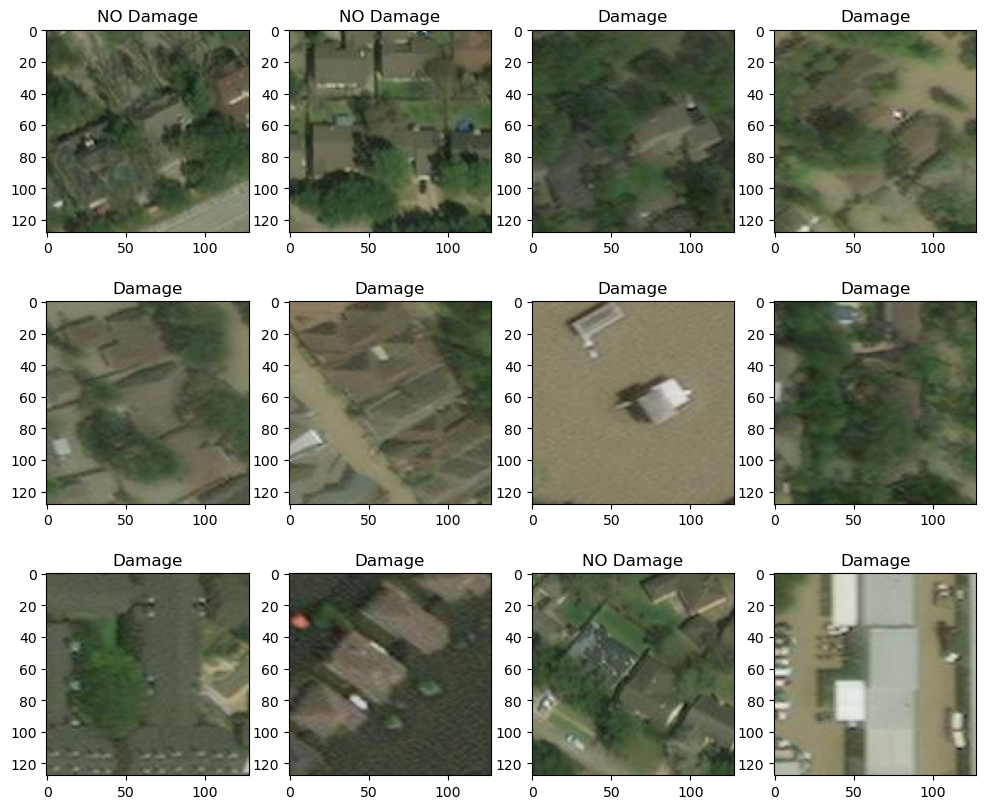

In [15]:
plt.figure(figsize=(12,10))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_train[i])
    if label_train[i]==1:
        plt.title("NO Damage")
    else:
        plt.title("Damage")

In [17]:
from skimage.transform import resize

X_train=[]
for i in image_train:
    X_train.append(resize(i,(64,64,3)))

X_train= np.array(X_train)

X_test=[]
for i in image_test:
    X_test.append(resize(i,(64,64,3)))

X_test=np.array(X_test)

In [18]:
y_train=np.array(label_train)
y_test=np.array(label_test)


In [ ]:
plt.figure(figsize=(12,10))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i])
    if y_train[i]==1:
        plt.title("NO Damage")
    else:
        plt.title("Damage")

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Input

model=Sequential([
    Input(shape=(64,64,3)),
    Conv2D(16,(3,3),activation='relu'),
    MaxPool2D(2,2),
    Conv2D(32,(3,3),activation='relu'),
    MaxPool2D(2,2),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
    
])

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
model.fit(X_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 60s 117ms/step - accuracy: 0.6631 - loss: 0.6188 - val_accuracy: 0.7450 - val_loss: 0.5094
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.8134 - loss: 0.4500 - val_accuracy: 0.8580 - val_loss: 0.3794
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.8595 - loss: 0.3680 - val_accuracy: 0.8910 - val_loss: 0.2897
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.8763 - loss: 0.3164 - val_accuracy: 0.9120 - val_loss: 0.2648
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.8958 - loss: 0.2704 - val_accuracy: 0.8770 - val_loss: 0.3229
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.9110 - loss: 0.2323 - val_accuracy: 0.9300 - val_loss: 0.1867
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9220 - loss: 0.2020 - val_accuracy: 0.9370 - val_loss: 0.1805
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.9302 - loss: 0.1724 -

In [26]:
model.evaluate(X_train,y_train)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9534 - loss: 0.1317


[0.13548868894577026, 0.9509999752044678]

In [27]:
y_pred=(model.predict(X_test) > 0.5).astype(int)

282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


In [28]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

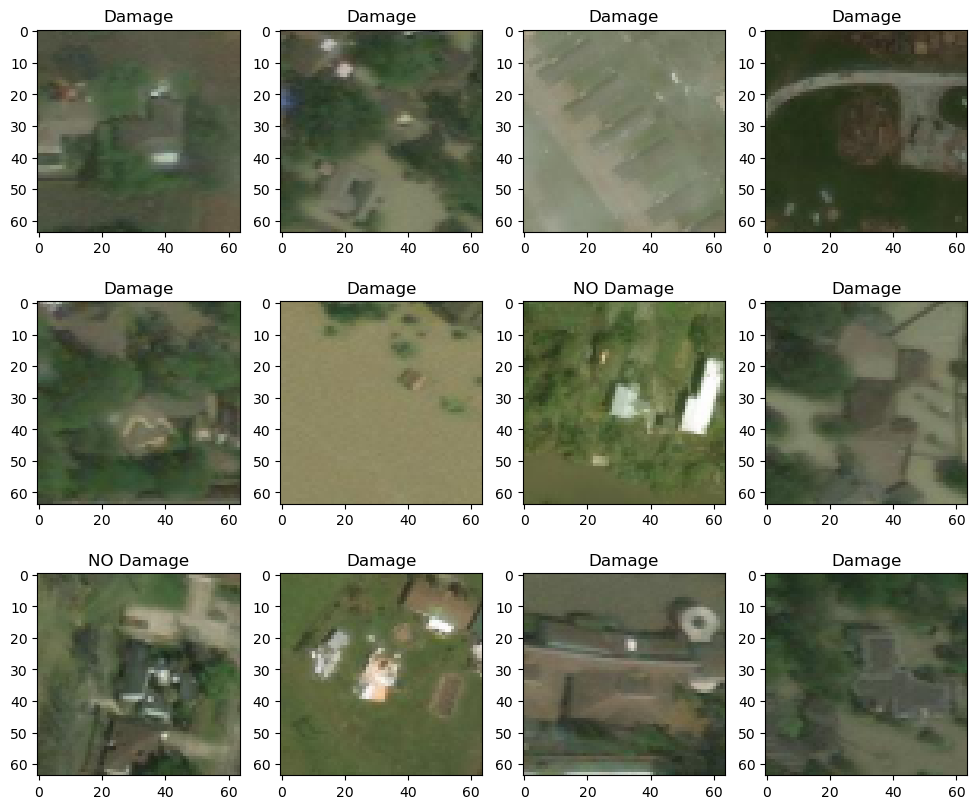

In [30]:
plt.figure(figsize=(12,10))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[i])
    if y_pred[i]==1:
        plt.title("NO Damage")
    else:
        plt.title("Damage")

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(f"Accuracy is {accuracy_score(y_test,y_pred)}")

Accuracy is 0.9074444444444445


<Axes: >

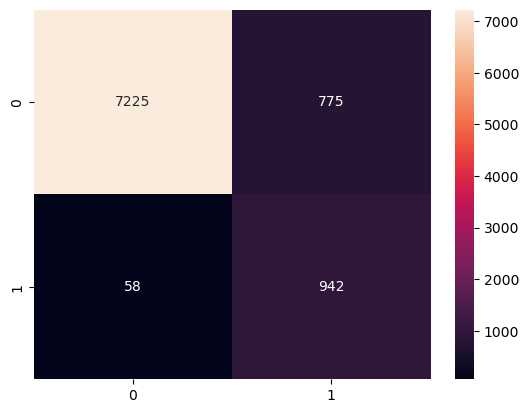

In [41]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')